1. Creating New Features From "PassengerId" Feature

- We know that each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number of people within the group.
- So we can create a new feature Group_Size which will indicate total number of members present in each group.
- We can create one more new feature Travelling Solo indicating whether the passenger is travelling solo or in a group.

In [2]:
#import required packages 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read in the train and test datasets

train_raw=pd.read_csv('train_raw.csv',delimiter=',')

test_raw=pd.read_csv('test_raw.csv',delimiter=',')

In [16]:
def passengerid_new_features(df):
    
    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    
    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()
    
    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)
    
    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)
    
    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]
    
    return df

In [17]:
#add new features to train and test set

train_clean = passengerid_new_features(train_raw)
test_clean = passengerid_new_features(test_raw)

In [18]:
#drop uneeded columns

train_clean.drop(columns=["Group","Member"],inplace=True)
test_clean.drop(columns=["Group","Member"],inplace=True)

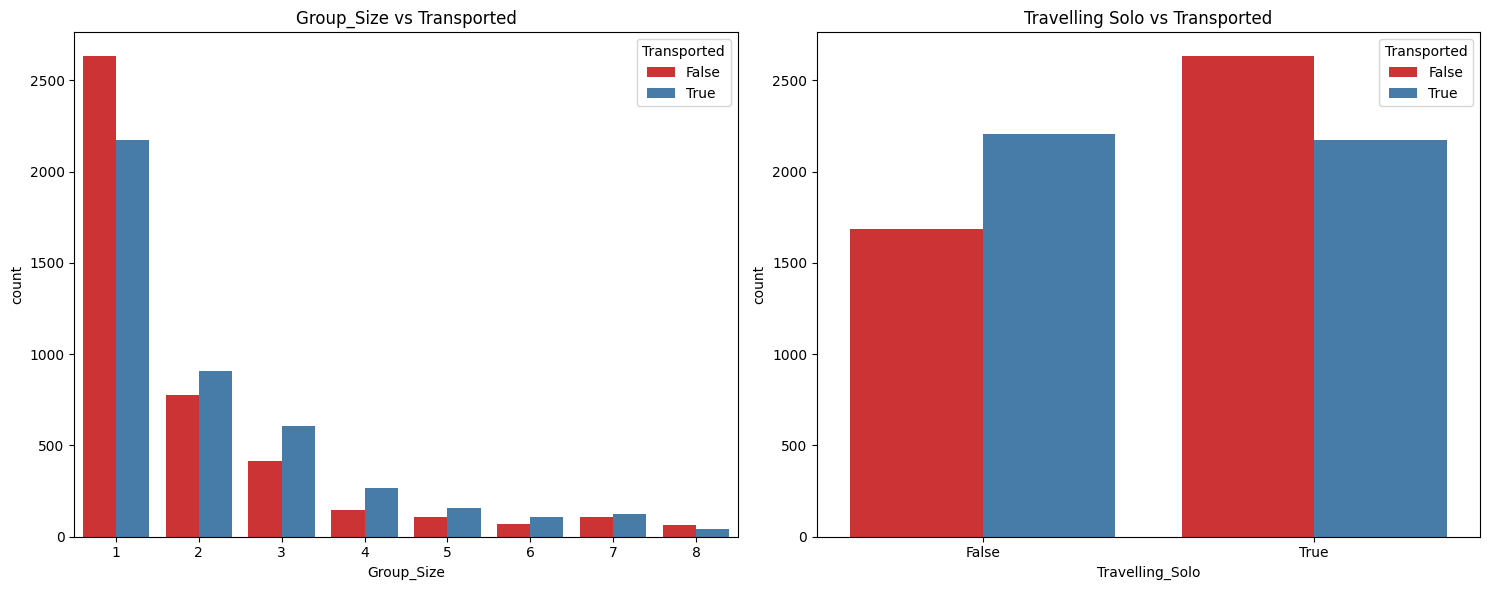

In [19]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_clean,palette="Set1")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_clean,palette="Set1")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

2. Feature engineering on Cabin

- We know that cabin feature consists of deck/num//side , where deck is deck loacation, num is deck_number and side can be P for port or S for Starboard.
- We can separate all these 3 values from cabin & create three new features Cabin_Deck, Cabin_Number & Cabin_Side.
- We also know that Cabin feature is having NaN values so to avoid error while splitting we have to replace it in such a way taht we can split those NaN Values in all three new features respectively.

In [20]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
    
    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

In [21]:
#apply function to train and test datasets 

cabin_new_feature(train_clean)
cabin_new_feature(test_clean)

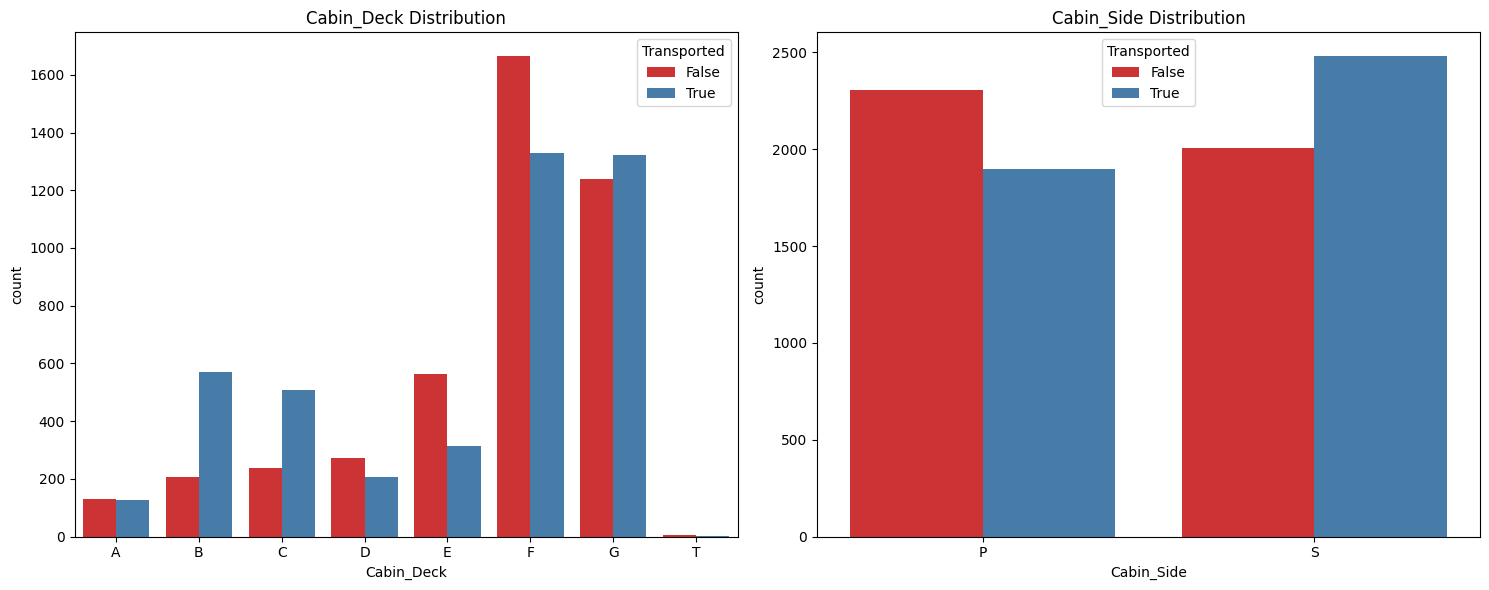

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_clean, palette="Set1",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_clean, palette="Set1")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()

In [25]:
train_clean["Cabin_Number"]=train_clean["Cabin_Number"].astype(int)
test_clean["Cabin_Number"]=test_clean["Cabin_Number"].astype(int)

In [26]:
print("Total Unique values present in Cabin_Number feature is:",train_clean["Cabin_Number"].nunique())
print("The Mean of Cabin_Number Feature is: ",train_clean["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",train_clean["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",train_clean["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",train_clean["Cabin_Number"].max())

Total Unique values present in Cabin_Number feature is: 1817
The Mean of Cabin_Number Feature is:  596.3989416772115
The Median of Cabin_Number Feature is: 427.0
The Minimum value of Cabin_Number feature is: 0
The Maximum value of Cabin_number Feature is: 1894


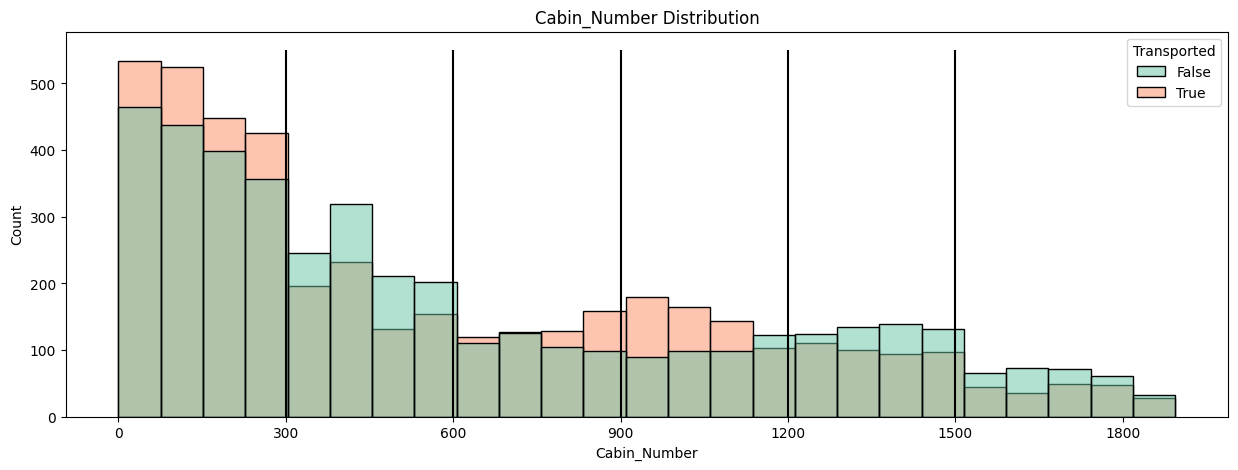

In [27]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_clean,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

In [28]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [29]:
cabin_regions(train_clean)
cabin_regions(test_clean)

In [30]:
train_clean.drop(columns=["Cabin_Number"],inplace=True)
test_clean.drop(columns=["Cabin_Number"],inplace=True)

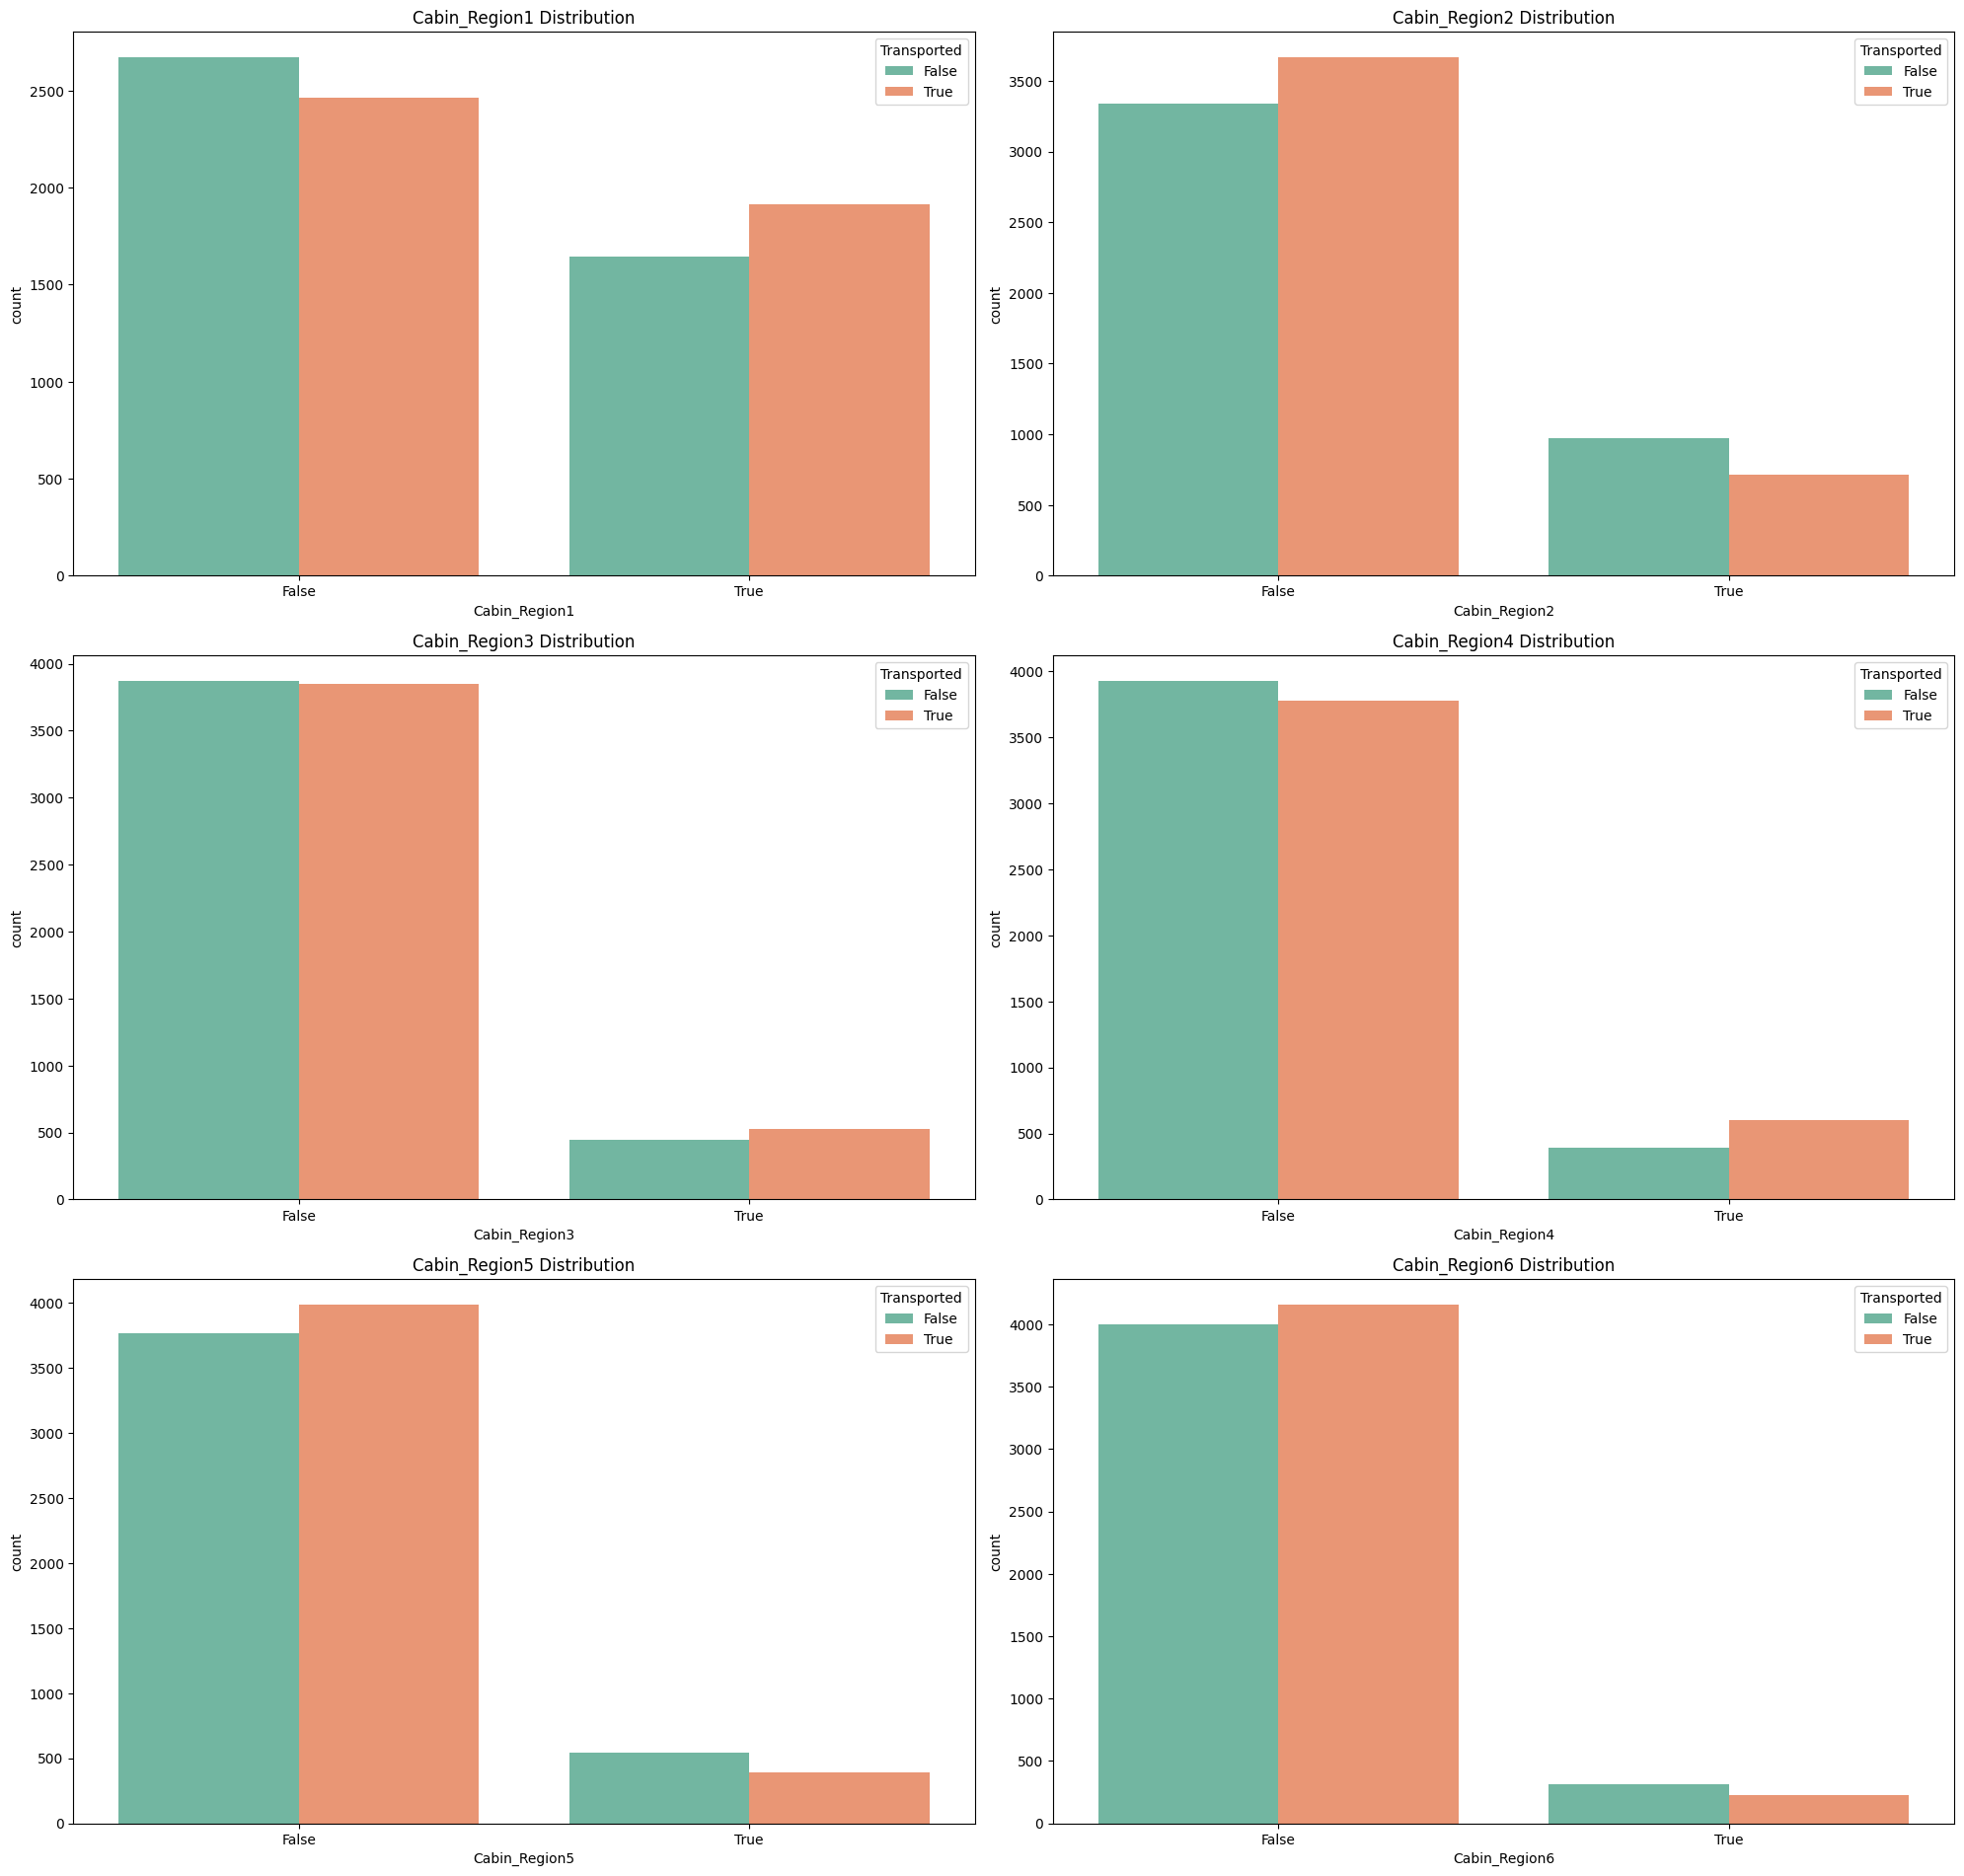

In [31]:
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_clean, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()

How we will do feature engineering on Age Feature?

- As we have done EDA on Age feature we collected some insights over there that the ages can be splitted into different groups based on Transported.
- So we will create a new feature name Age Group and will split the Age into different groups on the basics of insights we gainedfrom EDA.

In [32]:
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_0-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33_50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)
        
    df["Age Group"] = age_group

In [33]:
age_group(train_clean)
age_group(test_clean)

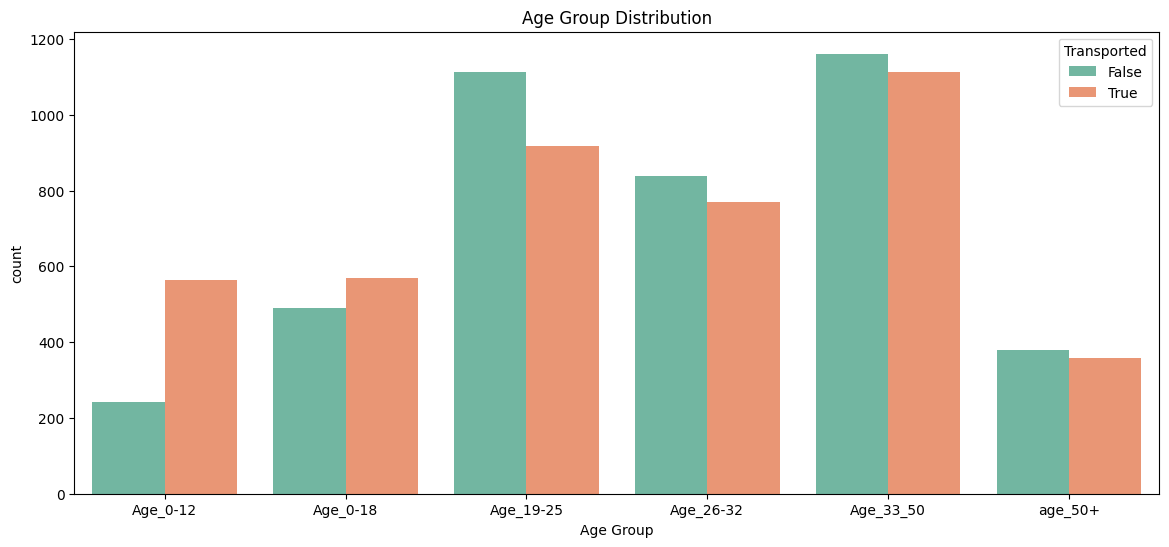

In [34]:
order = sorted(train_clean["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported", data=train_clean, palette="Set2",order=order)
plt.title("Age Group Distribution");

How can we do feature engineering on all expenditure featrues
- When we have done EDA on this expenditure features we gained some insights as:-
1. We can create a Total Expenditure Feature by combining all the expenditures.
2. We can create a No Spending boolean feature from Total Expenditure feature indicating True for those passengers who have spent 0 expense.
3. We can split Total Expenditure into different categories indicating whether the person is having no_expense, low_expense, medium_expense or high_expense and can create a new feature Expenditure Category.

In [37]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)


In [38]:
new_exp_features(train_clean)
new_exp_features(test_clean)

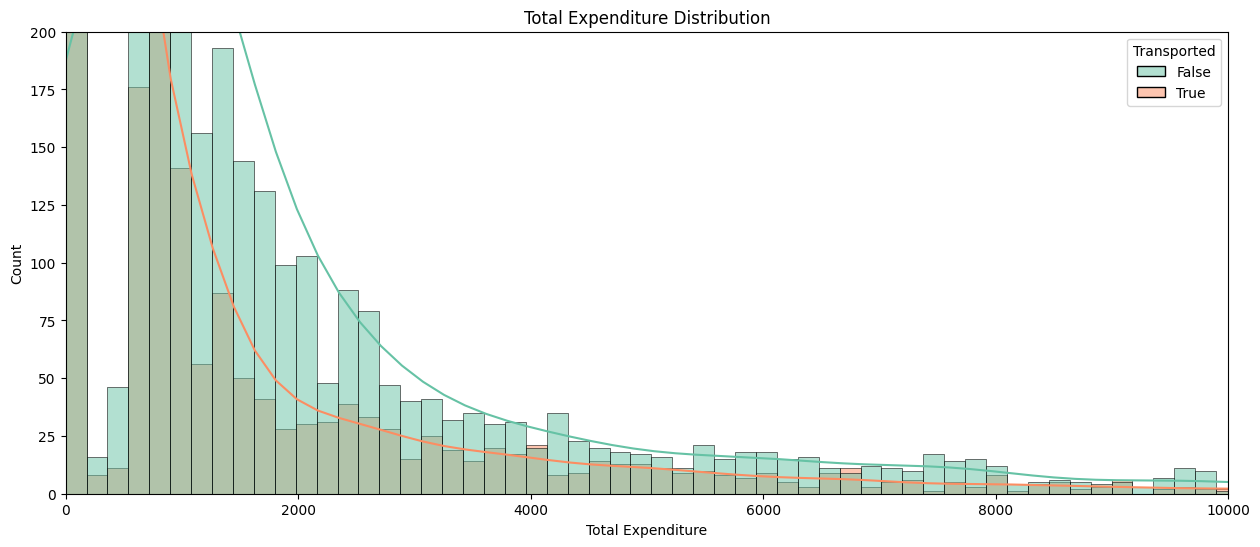

In [39]:
plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure", hue="Transported", data=train_clean, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distribution");

In [40]:
mean = round(train_clean["Total Expenditure"].mean())
median = train_clean["Total Expenditure"].median()

print("Mean value of Total Expenditure feature is = ",mean)
print("Median value of Total Expenditure feature is = ",median)

Mean value of Total Expenditure feature is =  1441
Median value of Total Expenditure feature is =  716.0


Insights
- Using above measure of central tendency values we can split Total Expenditure Features into different expense categories.
- If Total Expenditure is equal to 0 then No Expense category.
- If Total Expenditure is between 1-716 then Low Expense category.
- If Total Expenditure is between 717-1441 then Medium Expense category.
- If Total Expenditure is greater thean 1441 then High Expense category.

In [42]:
def expenditure_category(df):
    expense_category = []
    
    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")
    
    df["Expenditure Category"] = expense_category


In [43]:
expenditure_category(train_clean)
expenditure_category(test_clean)

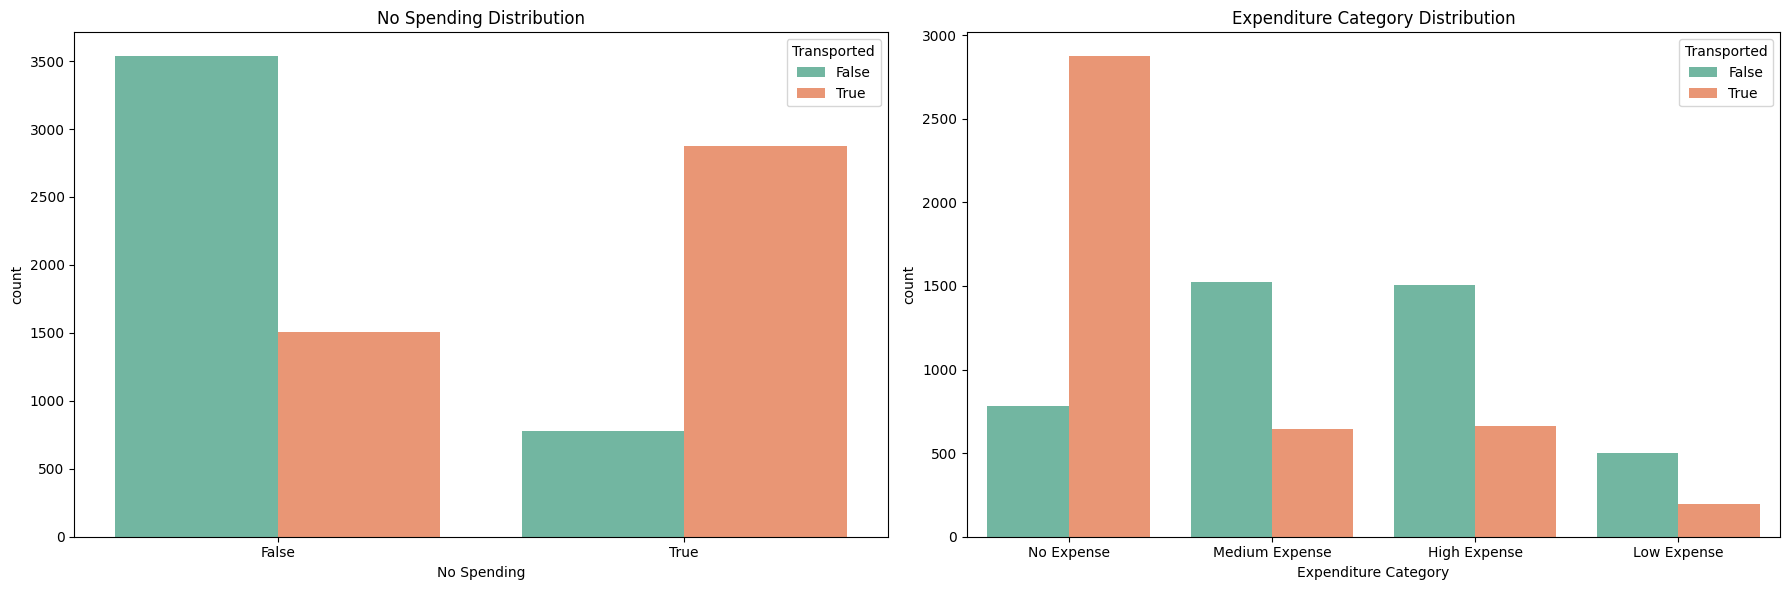

In [44]:
cols = ["No Spending", "Expenditure Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_clean, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [ ]:
# we can observe passengers with no spending are more likely to be transported 